1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import trapz


In [3]:
#a Fill a numpy array x with a variable normally distributed
mean= 0    
std = 0.5 
x = np.random.normal(mean,std,200)

[Text(0, 0.5, 'counts')]

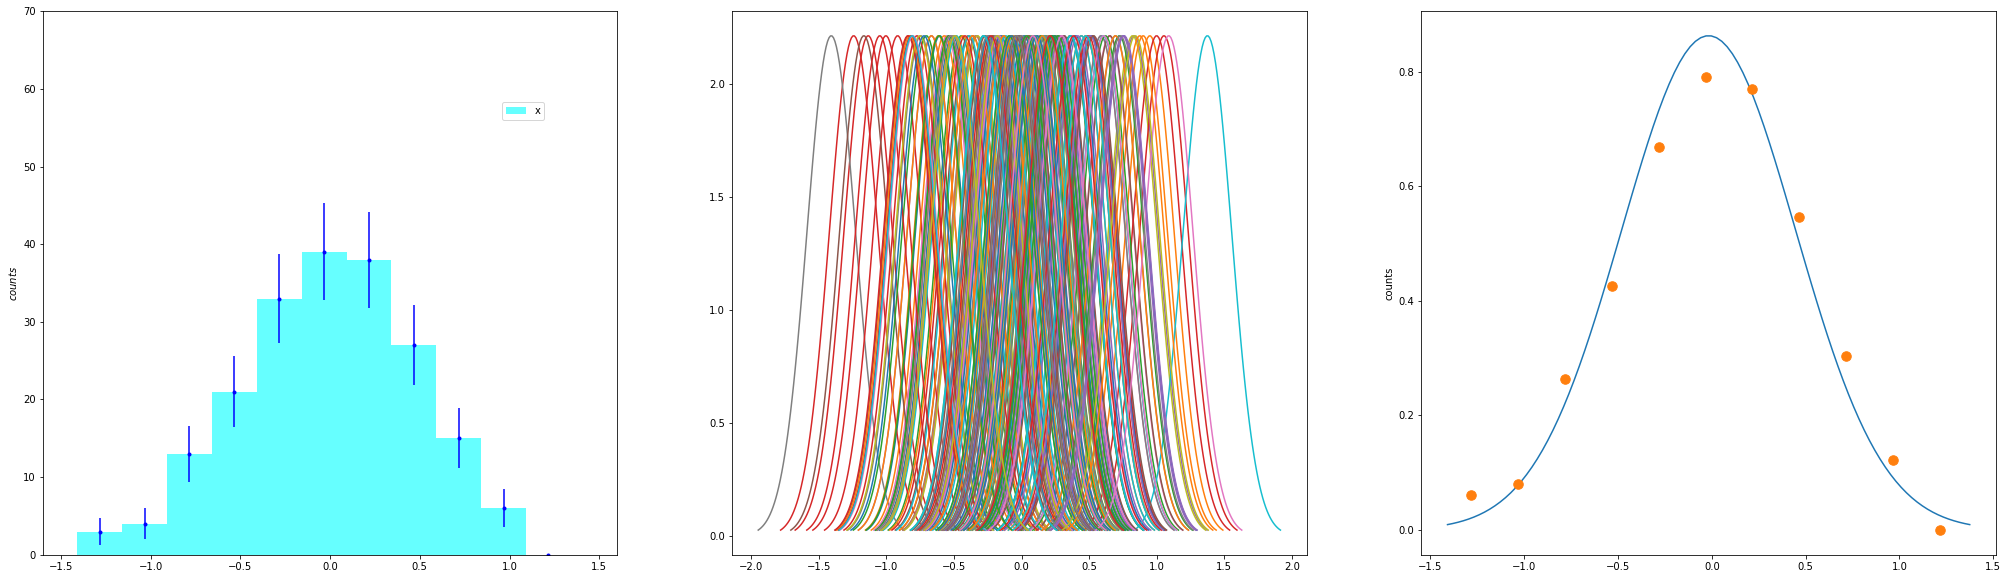

In [9]:
#b Fill an histogram in pyplot 
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(35,10))

count, bins, _= ax1.hist(x, bins=np.arange(x.min(), x.max(),0.25), label='x', alpha=0.6, color='cyan')
ax1.legend(loc=(0.8, 0.8))
ax1.set(ylabel='$counts$')
ax1.set(xlim=(-1.6, 1.6))
ax1.set(ylim=(0, 70))

bin_centers = 0.5 * (bins[:-1] + bins[1:])  # calculate bin centers
ax1.errorbar(bin_centers, count, yerr=np.sqrt(count), fmt='b.') # draw errobars, use the sqrt error
#ax1.show()


# for every element of x, create a gaussian and plot it
sigma = 1.06*x.std()*(x.size**(-1/5))
g = []
for i in range(200):
    mu = x[i]
    x_new = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    g.append(stats.norm.pdf(x_new, mu, sigma))
    ax2.plot(x_new, g[i])


#correct
gauss_sum= np.sum(g,axis=0)
a = np.linspace(x.min(), x.max(), 100)
integr=np.trapz(gauss_sum, dx=(a[1]-a[0]) )
integr_2=np.trapz(count, dx=bins[1]-bins[0])

ax3.plot(a,gauss_sum/integr)
ax3.plot(bin_centers, count/integr_2,'.', markersize=19)
ax3.set(ylabel='counts')


In [ ]:
    
# Sum all gaussian no
bin_width = bins[1] - bins[0]
area = bin_width * sum(count)

g_summed = np.sum(g,axis=0)
normalization = trapz(g_summed,x_new)
normalized = g_summed*area/normalization
plt.plot(x_new,normalized)
plt.plot(bin_centers, count/normalization,'.')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2022-12-15 09:00:18--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2022-12-15 09:00:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucffef080decffed4a1fd0b0d0b5.dl.dropboxusercontent.com/cd/0/inline/BypzAMLFr42ysEQ7dBs9d8iFw8N9l1wQog8Tzi8Fn69zAG5k66J5mJzlyXnxaAoxJ6uxix6G88oC1IkXHDT34MNZ0ESAho2H1QtdkaYlpPkeijq8AscrxxkCQt_2VgqZ2UUlEi5nbHBM2_EVKAE77D1GufBr655S6lhE1UbCBAQs1Q/file# [segue]
--2022-12-15 09:00:21--  https://ucffef080decffed4a1fd0b0d0b5.dl.dropboxusercontent.com/cd/0/i

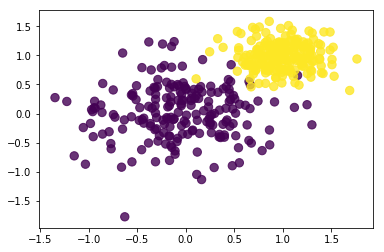

In [1]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

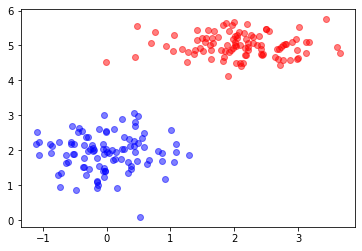

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean1 = 2    
std1 = 0.7 
ax1 = np.random.normal(mean1,std1,100)

mean2 = 5    
std2 = 0.3
ax2 = np.random.normal(mean2,std2,100)

mean3 = 0    
std3 = 0.5
ax3 = np.random.normal(mean3,std3,100)

mean4 = 2    
std4 = 0.5
ax4 = np.random.normal(mean4,std4,100)

plt.scatter(ax1, ax2, c='r', alpha=0.5)
plt.scatter(ax3, ax4, c='b', alpha=0.5)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [41]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2023-01-26 17:07:33--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2023-01-26 17:07:35--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc2c345f5df5215a118e6b3caf04.dl.dropboxusercontent.com/cd/0/inline/B1R1cYAS4y3AEYQKjGPKGmugSqSNDcyTEMcruqO7CEQSIKHLpodt2_CqYL1lO5KwvKkEQR_K3QW8saYIZ_l70welFST6Z2EVT2jgdt6weiSs8_8esrjHq2cbjFcO-hGnhcpgnC8g6245reLbeRf6_WhPZhiTQeVtLXJUyAGNHxbi5w/file# [segue]
--2023-01-26 17:07:35--  https://uc2c345f5df5215a118e6b3caf04.dl.dropboxusercontent.com/cd/0/inline/B1R1cYAS4y3AEYQKjGPKGmugSqSNDcyTEMcr

In [13]:
data=np.load('residuals_261.npy',allow_pickle=True)
df=pd.DataFrame(data.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


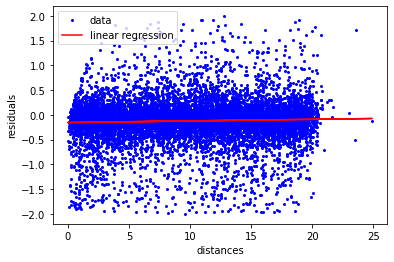

In [14]:
#Clean the sample by selecting the entries (rows) with the variable abs(residual)< 2
df=df[abs(df['residuals'])<2]

#linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
slope, intercept, _, _ , _=scipy.stats.linregress(df['distances'], df['residuals'])

# plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression
plt.plot(df['distances'], df['residuals'], 'o', c='b', label='data', markersize=2)
plt.plot(df['distances'], intercept+slope*df['distances'], 'r', label='linear regression')

plt.legend(loc='upper left')
plt.ylabel('residuals')
plt.xlabel('distances')
plt.show()

Text(27.125, 0.5, 'Residuals')

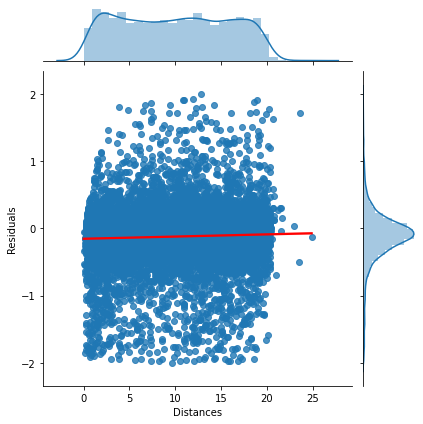

In [20]:
sns.jointplot(x='distances', y='residuals', data = df, kind = 'reg',  line_kws={"color": "red"})
plt.xlabel('Distances')
plt.ylabel('Residuals')

[-0.19912698 -0.16162809 -0.16238713 -0.13582467 -0.12458895 -0.0808601
 -0.09546007 -0.07435195 -0.07927447 -0.09501181 -0.12886903 -0.14438574
 -0.15337501 -0.13603589  0.        ]
[0.46497316 0.42017538 0.42298854 0.36939248 0.4529965  0.434597
 0.43409257 0.42374632 0.46997639 0.48661208 0.45986826 0.45777001
 0.42236314 0.40938139 0.        ]


<ErrorbarContainer object of 3 artists>

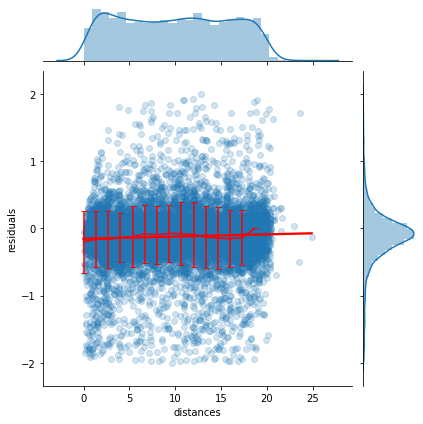

In [22]:
#x=array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
#y= the mean values of the "residuals", estimated in slices (bins) of "distance"
#erry= the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"

#x
x = np.arange(0,20, 20/15)
bins = (x[1:]+x[:-1])/2  #li sfalso 

#y
y=np.zeros(15)
for i in range(0,15-1):
    df_i=df[(df['distances']< x[i+1]) & (df['distances'] > x[i])]
    a=df_i.mean(axis=0)
    y[i]=a[0]
print(y)

#erry
erry=np.zeros(15)
for i in range(0,15-1):
    df_i=df[(df['distances']< x[i+1]) & (df['distances'] > x[i])]
    a=df_i.std(axis=0)
    erry[i]=a[0]
print(erry)

import seaborn as sns
sns.jointplot(x=df['distances'], y=df['residuals'], data=df, kind="reg", line_kws={"color": "red"}, scatter_kws={'alpha':0.2});
plt.errorbar(x, y, yerr = erry, color='red',capsize=3)